In [19]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

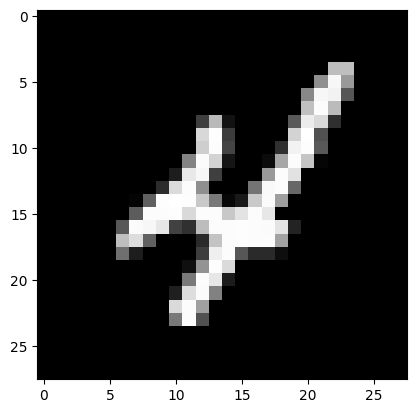

In [20]:
(X_train,y_train), (X_test, y_test)= mnist.load_data()
plt.subplot()
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

Deep Learning Model with Multi-Layer Perceptrons using MNIST:
Build a simple neural network model with a single hidden layer for the MINSIT dataset.

In [21]:
### Import Libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [22]:
### Data Reshape:
##Each image is 28X28 size, so there are 784 pixels. So, the output layer has 10 outputs, the hidden layer has 784 neurons and the input layer has 784 inputs. 
number_pix=X_train.shape[1]*X_train.shape[2] 
X_train=X_train.reshape(X_train.shape[0], number_pix).astype('float32')
X_test=X_test.reshape(X_test.shape[0], number_pix).astype('float32')

In [23]:
### Data Normalization
## data is normalized from (0-255) to (0-1) and the target variable is one-hot encoded
# The target variable has a total of 10 classes (0-9)
X_train=X_train/255
X_test=X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [28]:
### Create the NN Model function
def nn_model():
    model=Sequential()
    model.add(Dense(number_pix, input_dim=number_pix, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimiser='Adam', metrics=['accuracy'])
    return model

In [ ]:
model=nn_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)
score= model.evaluate(X_test, y_test, verbose=0)

CNN Model using MNIST

In [37]:
## Import liberaries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [38]:
## set the seed and load the data
seed=10
np.random.seed(seed)
(X_train,y_train), (X_test, y_test)= mnist.load_data()

In [39]:
## convert into float
X_train=X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

In [40]:
## Data Normalization
X_train=X_train/255
X_test=X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [56]:
def cnn_model():
    cnn_model=Sequential()
    cnn_model.add(Conv2D(32,5,5, padding='same',input_shape=(1,28,28), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dense(num_classes, activation='softmax'))
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
## Run the model
cnn_model= cnn_model()
cnn_model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)
score= cnn_model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))